In [9]:
#assignment2
#本作业在遇到困难的时候，均有向豆包提问，以寻找解决思路
#1.Significant earthquakes since 2150 B.C.
#1.1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
Sig_Eqs = pd.read_csv("earthquakes-2025-11-04_09-42-14_+0800.tsv", sep='\t')
Sig_Eqs['Total Deaths'] = Sig_Eqs['Total Deaths'].fillna(0)
deaths_by_country = Sig_Eqs.groupby('Country')['Total Deaths'].sum().reset_index()
top_10_countries = deaths_by_country.sort_values('Total Deaths', ascending=False).head(10)
print(top_10_countries)

        Country  Total Deaths
28        CHINA     2106524.0
142      TURKEY     1008863.0
65         IRAN      761654.0
132       SYRIA      487726.0
69        ITALY      423280.0
58        HAITI      323782.0
71        JAPAN      319443.0
10   AZERBAIJAN      319251.0
64    INDONESIA      282838.0
6       ARMENIA      189000.0


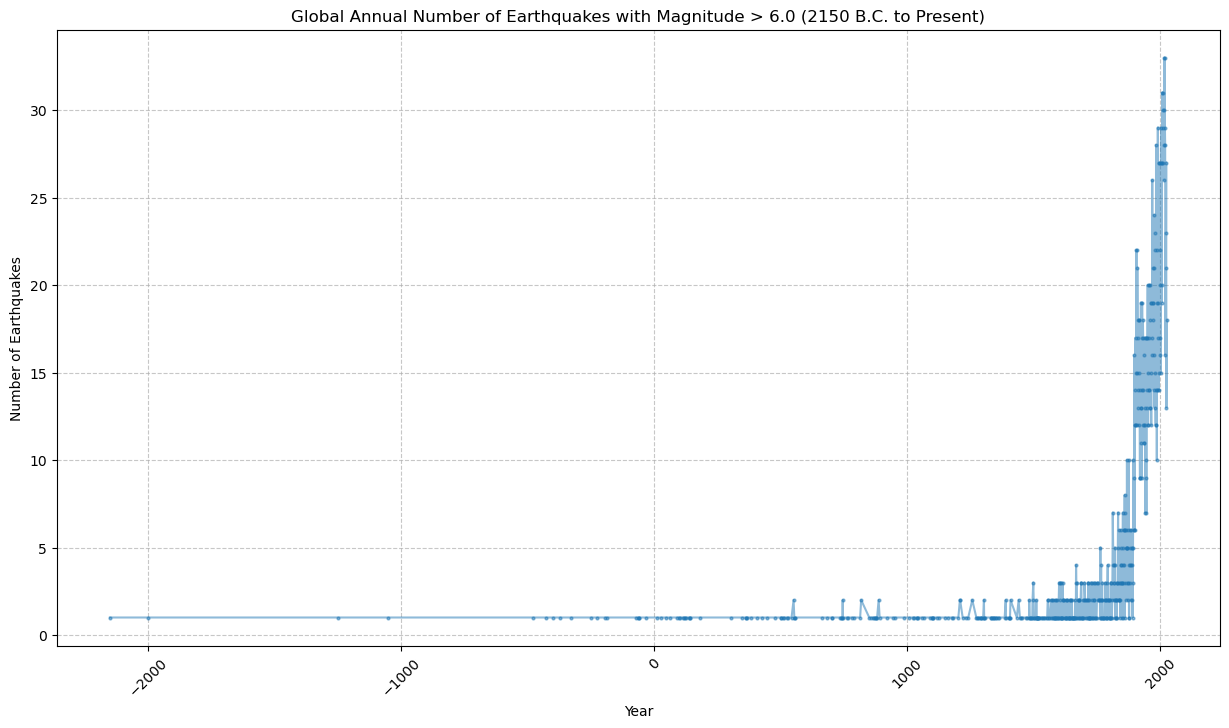

In [19]:
#1.2
mag_over_6 = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]
annual_eq_count = mag_over_6.groupby('Year')['Mag'].count().reset_index(name='Earthquake Count')
plt.figure(figsize=(15, 8), dpi=100)  # 设置图表大小
plt.plot(annual_eq_count['Year'], annual_eq_count['Earthquake Count'], marker='o', markersize=2, linestyle='-', alpha=0.5)
plt.xticks(rotation=45)
plt.title('Global Annual Number of Earthquakes with Magnitude > 6.0 (2150 B.C. to Present)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线，方便观察
plt.show()

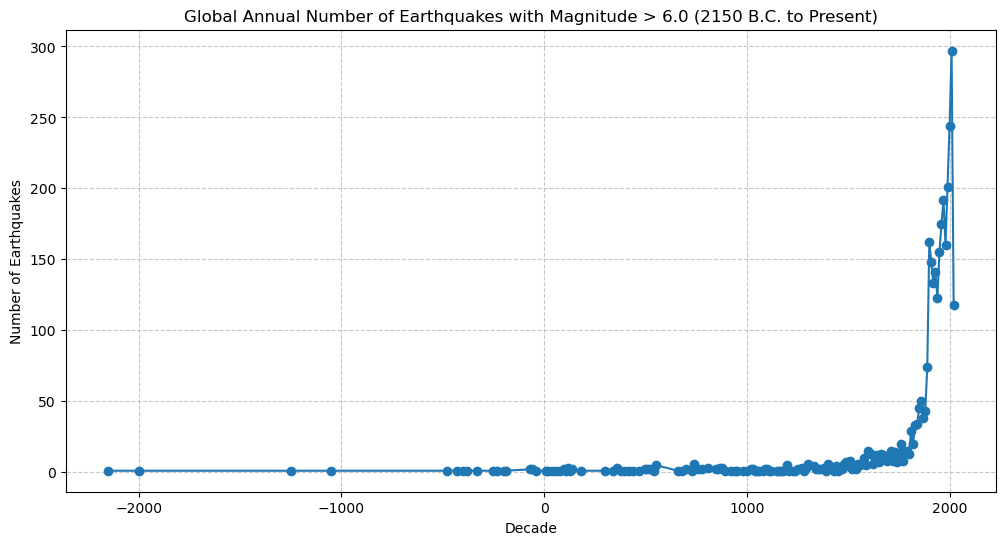

In [17]:
#1.2（以十年为一组展示）
# 筛选时显式生成副本，避免视图问题
mag_over_6 = Sig_Eqs[Sig_Eqs['Mag'] > 6.0].copy()  
# 先给年份做“十年取整”（如1995年→1990年，2003年→2000年）
mag_over_6['Decade'] = (mag_over_6['Year'] // 10) * 10  
# 按“十年”分组，统计每组的地震数量
annual_eq_count = mag_over_6.groupby('Decade')['Mag'].count().reset_index(name='Earthquake Count')
plt.figure(figsize=(12, 6))  # 设置图表大小
plt.plot(annual_eq_count['Decade'], annual_eq_count['Earthquake Count'], marker='o', linestyle='-')
plt.title('Global Annual Number of Earthquakes with Magnitude > 6.0 (2150 B.C. to Present)')
plt.xlabel('Decade')
plt.ylabel('Number of Earthquakes')
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线，方便观察
plt.show()

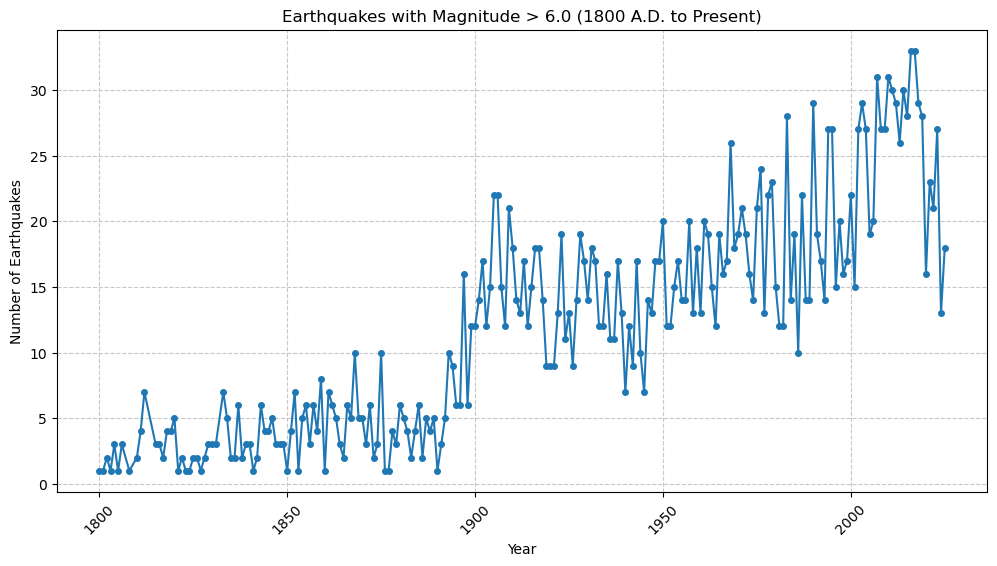

In [22]:
#1.2（1800年-现在的地震数量）
# 1. 读取数据并筛选震级>6.0的地震
Sig_Eqs = pd.read_csv("earthquakes-2025-11-04_09-42-14_+0800.tsv", sep='\t')
mag_over_6 = Sig_Eqs[Sig_Eqs['Mag'] > 6.0].copy()  # 显式创建副本，避免警告

# 2. 关键：筛选出“年份≥1800”的数据（只保留1800年至今的记录）
# 假设“Year”列中，公元1800年记为1800，现在的年份（如2025）记为正数
mag_over_6_1000_present = mag_over_6[mag_over_6['Year'] >= 1800]

# 3. 按年份（或十年）分组统计数量（这里以“年份”为例，如需十年分组可参考之前的方法）
annual_eq_count = mag_over_6_1000_present.groupby('Year')['Mag'].count().reset_index(name='Earthquake Count')

# 4. 绘制1800年至今的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(annual_eq_count['Year'], annual_eq_count['Earthquake Count'], marker='o', linestyle='-', markersize=4)
plt.title('Earthquakes with Magnitude > 6.0 (1800 A.D. to Present)')  # 标题明确时间范围
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # 旋转X轴标签，避免重叠
plt.show()

In [ ]:
#分析
#从绘图的结果（2150 B.C.-present）来看，发生大于六级的地震的次数总体上呈现一个上升的趋势。但我不认为这是大于六级的地震的发生频率增加了，而是早期的数据的地震数量被严重低估，人们的监测技术随着年份增加提升了的结果。
#从1800-present的绘图结果来看，全球每年震级＞6.0 的地震数量无明显的长期上升或下降趋势，整体呈现周期性波动的特征，这可以由“地震是地球板块运动的结果，而板块活动本身具有周期性（活跃期与平静期交替）”来解释

In [33]:
#1.3
# 定义一个函数，处理单条记录的日期字段（处理缺失值）
def format_date(row):
    # 年份必存在，直接转换为整数
    year = int(row['Year'])
    
    # 处理月份（Mo）：若缺失，后续所有字段用??；若存在，格式化为两位数字（如3→03）
    if pd.isna(row['Mo']):
        mo = '??'
        dy = '??'
        hr = '??'
        mn = '??'
        sec = '??'
    else:
        mo = f"{int(row['Mo']):02d}"  # 补零，确保两位（如5→05）
        
        # 处理日期（Dy）：若缺失，后续时间字段用??
        if pd.isna(row['Dy']):
            dy = '??'
            hr = '??'
            mn = '??'
            sec = '??'
        else:
            dy = f"{int(row['Dy']):02d}"  # 补零
            
            # 处理小时（Hr）：若缺失，后续分钟、秒用??
            if pd.isna(row['Hr']):
                hr = '??'
                mn = '??'
                sec = '??'
            else:
                hr = f"{int(row['Hr']):02d}"  # 补零
                
                # 处理分钟（Mn）：若缺失，秒用??
                if pd.isna(row['Mn']):
                    mn = '??'
                    sec = '??'
                else:
                    mn = f"{int(row['Mn']):02d}"  # 补零
                    
                    # 处理秒（Sec）：可能有小数，缺失则用??
                    if pd.isna(row['Sec']):
                        sec = '??'
                    else:
                        sec = f"{float(row['Sec']):.1f}"  # 保留1位小数
    
    # 拼接为可读的日期格式
    return f"{year}年{mo}月{dy}日 {hr}:{mn}:{sec}"
    
def CountEq_LargestEq(doc,cty):
# 1. 筛选该国家的所有地震数据（含所有记录，不管震级是否缺失）
    country_all_data = doc[doc['Country'] == cty].copy()
    if country_all_data.empty:  # 该国家无任何地震记录
        return 0, "无地震记录"
    
    # 2. 筛选出震级非缺失的有效记录
    country_mag_data = country_all_data[~pd.isna(country_all_data['Mag'])]
    if country_mag_data.empty:  # 该国家所有地震的震级都缺失
        return len(country_all_data), "无有效震级记录"
    
    # 3. 统计该国家的地震总数（所有记录的数量）
    eq_count = len(country_all_data)
    
    # 4. 找到该国家震级最大的地震
    largest_mag = country_mag_data['Mag'].max()
    largest_eq_rows = country_mag_data[country_mag_data['Mag'] == largest_mag]
    
    if largest_eq_rows.empty:  # 极端情况：最大震级行为空
        largest_eq_date = "无有效震级记录"
    else:
        largest_eq_row = largest_eq_rows.iloc[0]
        largest_eq_date = format_date(largest_eq_row)
        
    return eq_count, largest_eq_date

# 测试：获取中国的地震总数和最大震级日期
count, date = CountEq_LargestEq(Sig_Eqs, "CHINA")
print(f"中国地震总数：{count}次，最大震级地震日期：{date}")

中国地震总数：623次，最大震级地震日期：1668年07月25日 ??:??:??


In [34]:
# 获取所有唯一的国家名称
all_countries = Sig_Eqs['Country'].unique()

# 对每个国家调用函数，收集结果
results = []
for country in all_countries:
    eq_count, largest_date = CountEq_LargestEq(Sig_Eqs, country)
    results.append([country, eq_count, largest_date])

# 转换为DataFrame并按地震总数降序排序
results_df = pd.DataFrame(results, columns=['Country', 'Total Earthquakes', 'Largest Earthquake Date'])
results_df = results_df.sort_values('Total Earthquakes', ascending=False)

# 打印结果
print(results_df)

        Country  Total Earthquakes Largest Earthquake Date
15        CHINA                623    1668年07月25日 ??:??:??
34        JAPAN                424  2011年03月11日 05:46:24.1
73    INDONESIA                421  2004年12月26日 00:58:53.5
8          IRAN                388     856年12月22日 ??:??:??
10       TURKEY                358  1939年12月26日 23:57:23.8
..          ...                ...                     ...
151     BURUNDI                  1  2004年02月24日 02:14:34.0
157      ZAMBIA                  1  2017年02月24日 00:32:17.8
156  MADAGASCAR                  1  2017年01月11日 22:06:58.7
158     COMOROS                  1   2018年05月15日 15:48:9.9
0           NaN                  0                   无地震记录

[159 rows x 3 columns]


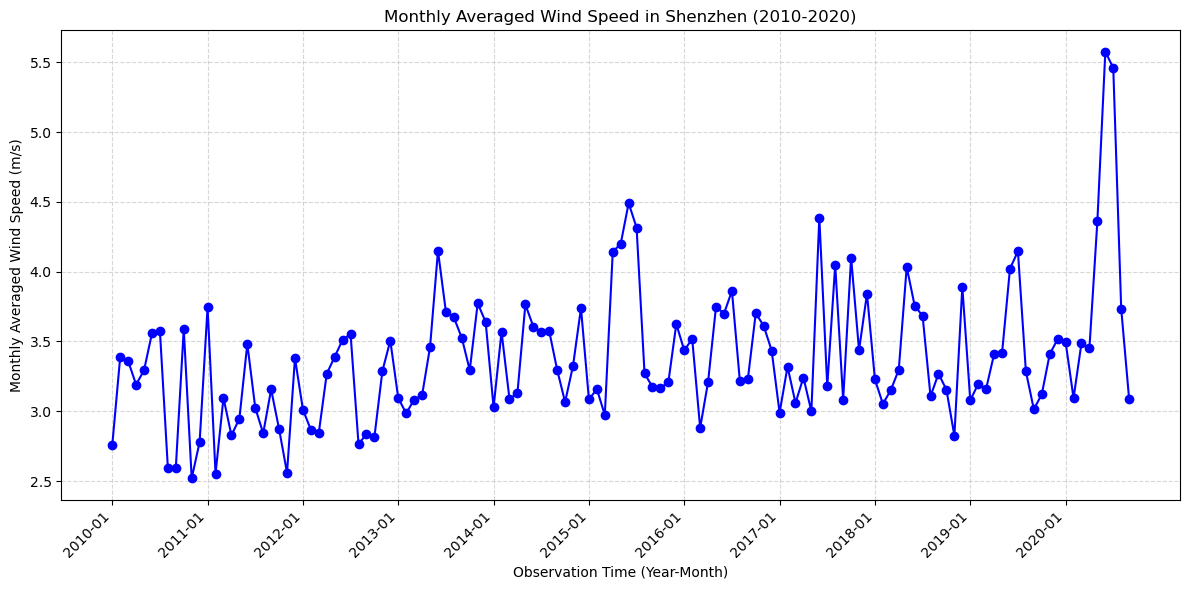

In [2]:
#2 Wind speed in Shenzhen from 2010 to 2020
import pandas as pd
import matplotlib.pyplot as plt
# 读取CSV文件
df = pd.read_csv('2281305.csv', low_memory=False)  

# 转换日期列为datetime类型，便于时间筛选
df['DATE'] = pd.to_datetime(df['DATE'])

# 筛选2010-2020年的数据（时间过滤）
# df['DATE'].dt.year：提取DATE列的“年份”
# 条件：年份≥2010 且 年份≤2020，符合条件的留下，存到time_filtered里
time_filtered = df[(df['DATE'].dt.year >= 2010) & (df['DATE'].dt.year <= 2020)]

# 从WND列解析风速（风速提取+清洗）
# ① 拆分WND列：按逗号分开，取第4段，转成数字
time_filtered['wind_speed_raw'] = time_filtered['WND'].str.split(',').str[3].astype(float)

# ② 处理风速：替换缺失值（9999→NaN），并÷10（应用缩放因子）
# replace(9999, float('nan'))：把9999换成空值，避免影响计算
# /10：把原始值转成实际风速（如0020→2.0米/秒）
time_filtered['wind_speed'] = time_filtered['wind_speed_raw'].replace(9999, float('nan')) / 10

# 按“年月”分组，计算每月平均风速
# df['DATE'].dt.to_period('M')：把时间转成“年月格式”
# groupby(...)：按“年月”把数据分成一组一组
# ['wind_speed'].mean()：对每组的wind_speed列算平均值（即月平均风速）
# reset_index()：把结果整理成表格形式
monthly_avg = time_filtered.groupby(time_filtered['DATE'].dt.to_period('M'))['wind_speed'].mean().reset_index()

# 给列改名字：DATE→observation_time（观测时间），wind_speed→monthly_avg_wind_speed（月平均风速）
monthly_avg.rename(columns={'DATE': 'observation_time', 'wind_speed': 'monthly_avg_wind_speed'}, inplace=True)

# 创建画布
plt.figure(figsize=(12, 6))

# 画折线图：x轴是年月，y轴是月平均风速，用蓝色线+圆点标记
plt.plot(monthly_avg['observation_time'].astype(str),  # 把“年月”转成文字，避免x轴显示异常
         monthly_avg['monthly_avg_wind_speed'], 
         marker='o',  # 每个数据点画圆点
         linestyle='-',  # 用直线连接点
         color='blue')  # 线的颜色是蓝色

# 给图表加标签
plt.title('Monthly Averaged Wind Speed in Shenzhen (2010-2020)')  # 标题：深圳2010-2020年月平均风速
plt.xlabel('Observation Time (Year-Month)')  # x轴标签：观测时间（年月）
plt.ylabel('Monthly Averaged Wind Speed (m/s)')  # y轴标签：月平均风速（米/秒）

# 调整x轴刻度（避免文字重叠）
plt.xticks(rotation=45, ha='right')  # 刻度文字旋转45度，靠右对齐
plt.xticks(monthly_avg['observation_time'].astype(str)[::12])  # 每12个刻度显示1个（即每年显示1个，避免拥挤）

# 加网格线
plt.grid(True, linestyle='--', alpha=0.5)  # 虚线网格，透明度50%

# 自动调整布局（避免标签被截断）
plt.tight_layout()

# 显示图表
plt.show()


In [ ]:
#从生成的折线图来看，2010-2020 年深圳月平均风速整体呈现波动变化，无明显的上升或下降长期趋势，但存在季节性波动特征，每年夏季（6-8 月）风速相对较高，冬季（12-2 月）风速相对较低。

In [1]:
#3 Explore a data set
#关于第三题的思路，我在CASEarth找到了中国1km分辨率月最高温度数据集（1901-2017），从中提取了2015年-2017年的数据，这个文件名字是tmx_2015_2017.nc
#然后我查询了我的家乡汕尾的经纬度，去看其中的一个格点的月最高温度随时间的变化
import xarray as xr

# 以“只读模式”打开文件
ds = xr.open_dataset("tmx_2015_2017.nc")

# 1. 先查看文件中的关键信息（变量名、时间维度等）
print("文件中的变量列表：", list(ds.variables.keys()))  # 比如可能有'temperature'、'time'等
print("时间维度信息：", ds['time'].values)  # 查看时间序列

文件中的变量列表： ['lon', 'lat', 'time', 'tmx']
时间维度信息： [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.]


In [2]:
print(ds)

<xarray.Dataset> Size: 5GB
Dimensions:  (lon: 7680, lat: 4717, time: 36)
Coordinates:
  * lon      (lon) float64 61kB 72.2 72.21 72.22 72.23 ... 136.2 136.2 136.2
  * lat      (lat) float64 38kB 55.55 55.55 55.54 55.53 ... 16.27 16.26 16.25
  * time     (time) float64 288B 1.0 2.0 3.0 4.0 5.0 ... 33.0 34.0 35.0 36.0
Data variables:
    tmx      (time, lat, lon) float32 5GB ...


In [3]:
print(ds['tmx'].attrs)  # 查看变量元数据，确认单位、含义

{'unit': '0.1 degree centigrade', 'long_name': 'monthly maximum temperature'}


In [4]:
# 2. 提取汕尾经纬度（115.3°E，22.8°N）附近格点，并转换单位（除以10得到℃）
shanwei_point = ds.sel(
    lon=115.3, 
    lat=22.8, 
    method='nearest'
)['tmx'] / 10  # 单位转换：0.1℃ → ℃

# 3. 转换为DataFrame并保存
df_shanwei = shanwei_point.to_dataframe().reset_index()
df_shanwei.columns = ['time', 'lon', 'lat', 'max_temperature']  # 重命名列（此时温度单位为℃）
df_shanwei.to_csv("shanwei_temperature_corrected.csv", index=False)

In [5]:
df_clean = df_shanwei.dropna(subset=['max_temperature']).reset_index(drop=True)
print(f"清洗后有效数据量：{len(df_clean)} 个时间点（2015-2017年共36个月）")

清洗后有效数据量：36 个时间点（2015-2017年共36个月）


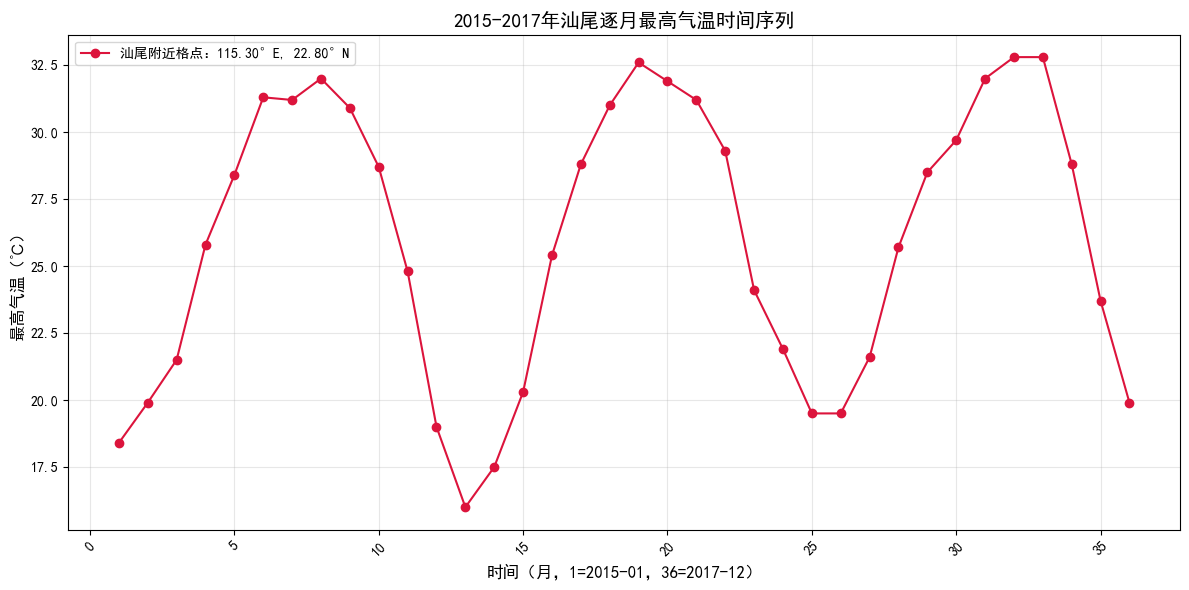

In [6]:
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 绘图（时间为1-36，对应2015-01到2017-12）
plt.figure(figsize=(12, 6))
plt.plot(
    df_clean['time'], 
    df_clean['max_temperature'], 
    marker='o', 
    linestyle='-', 
    color='crimson', 
    label=f"汕尾附近格点：{df_clean['lon'].unique()[0]:.2f}°E, {df_clean['lat'].unique()[0]:.2f}°N"
)
plt.title('2015-2017年汕尾逐月最高气温时间序列', fontsize=14)
plt.xlabel('时间（月，1=2015-01，36=2017-12）', fontsize=12)
plt.ylabel('最高气温（℃）', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
temp_data = df_clean['max_temperature']

stats = {
    "均值（℃）": temp_data.mean(),  # 3年平均逐月最高气温
    "中位数（℃）": temp_data.median(),  # 中间水平气温
    "标准差（℃）": temp_data.std(),  # 气温月际波动幅度
    "最大值（℃）": temp_data.max(),  # 极端高温（夏季）
    "最小值（℃）": temp_data.min()   # 极端低温（冬季）
}

print("汕尾附近格点逐月最高气温统计结果（2015-2017年）：")
for name, value in stats.items():
    print(f"{name}：{value:.2f}")

汕尾附近格点逐月最高气温统计结果（2015-2017年）：
均值（℃）：26.01
中位数（℃）：27.10
标准差（℃）：5.27
最大值（℃）：32.80
最小值（℃）：16.00


In [ ]:
#汕尾近三年逐月最高气温均值为 26.01℃，中位数为 27.18℃，整体呈现温暖气候特征，符合其亚热带季风气候的定位
#中位数高于均值，说明气温分布略呈右偏，夏季高温对整体气温分布的影响更为显著
#气温标准差为 5.27℃，表明月际间气温波动适中，季节变化明显但未出现极端不稳定的波动
#时间序列图清晰呈现年际周期性：每年夏季（约 6-8 月）气温达到峰值，冬季（约 12 月）降至低谷，且三年间的季节模式高度一致，气候的季节性规律稳定
#最高气温达 32.80℃，出现在夏季月份，反映汕尾夏季炎热的气候特点